In [150]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
city_df = pd.DataFrame(city_data)
ride_data = pd.read_csv(ride_data_to_load)
ride_df = pd.DataFrame(ride_data)

# Combine the data into a single dataset
combined_data = city_df.merge(ride_df, on=["city"])

# Display the data table for preview
combined_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

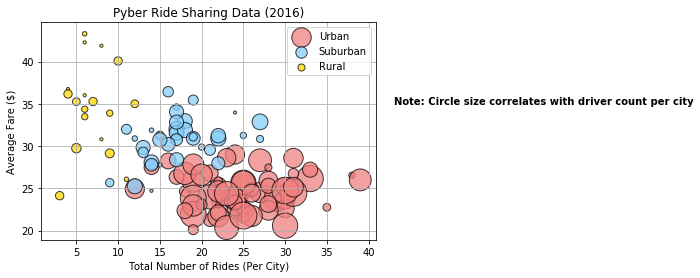

In [162]:
# Obtain the x and y coordinates for each of the three city types

#URBAN
# x-values
urban_values = combined_data.loc[combined_data['type'] == "Urban"]
city_groups_urban = urban_values.groupby(["city"]).count()
x_values_urban = city_groups_urban["ride_id"]

# y-values
fare_groups_urban = urban_values.groupby(["city"])["fare"].mean()
y_values_urban = fare_groups_urban

# driver count
urban_driver_count = urban_values.groupby(["city"])["driver_count"].unique()
urban_driver_count_clean = urban_driver_count.str[0]

#SUBURBAN
# x-values
suburban_values = combined_data.loc[combined_data['type'] == "Suburban"]
city_groups_suburban = suburban_values.groupby(["city"]).count()
x_values_suburban = city_groups_suburban["ride_id"]


# y-values
fare_groups_suburban = suburban_values.groupby(["city"])["fare"].mean()
y_values_suburban = fare_groups_suburban

# driver count
suburban_driver_count = suburban_values.groupby(["city"])["driver_count"].unique()
suburban_driver_count_clean = suburban_driver_count.str[0]

#RURAL
# x-values
rural_values = combined_data.loc[combined_data['type'] == "Rural"]
city_groups_rural = rural_values.groupby(["city"]).count()
x_values_rural = city_groups_rural["ride_id"]

# y-values
fare_groups_rural = rural_values.groupby(["city"])["fare"].mean()
y_values_rural = fare_groups_rural

# driver count
rural_driver_count = rural_values.groupby(["city"])["driver_count"].unique()
rural_driver_count_clean = rural_driver_count.str[0]

# Build the scatter plots for each city types
Urban = plt.scatter(x_values_urban, y_values_urban, marker="o", facecolors="lightcoral", label="Urban", s=urban_driver_count_clean*10, edgecolors="black", alpha=0.75)
Suburban = plt.scatter(x_values_suburban, y_values_suburban, marker="o", facecolors="lightskyblue", s=suburban_driver_count_clean*10, edgecolors="black", alpha=0.75, label="Suburban")
Rural = plt.scatter(x_values_rural, y_values_rural, marker="o", facecolors="gold", edgecolors="black", s=rural_driver_count_clean*10, alpha=0.75, label="Rural")

# s=rural_driver_count*10

#Add labels to the x and y axes
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

plt.grid()

#Create a legend
plt.legend(handles=[Urban, Suburban, Rural], loc="best")

# Incorporate a text label regarding circle size

plt.text(43, 35, "Note: Circle size correlates with driver count per city", horizontalalignment='left', size='medium', color='black', weight='semibold')
#sns.plt.show()

# Save Figure

plt.savefig("../Images/pyber_bubble.png")

plt.show()


## Total Fares by City Type

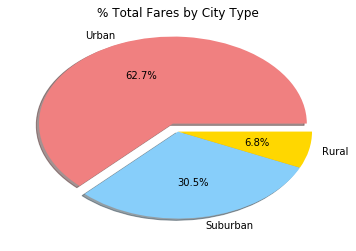

In [152]:
# Calculate Type Percents
#Calculate total fares

total_fares = combined_data["fare"].sum()

#URBAN %
urban_fare_sum = urban_values["fare"].sum()
urban_per = (urban_fare_sum / total_fares) * 100

# SUBURBAN %
suburban_fare_sum = suburban_values["fare"].sum()
suburban_per = (suburban_fare_sum / total_fares) * 100

# RURAL
rural_fare_sum = rural_values["fare"].sum()
rural_per = (rural_fare_sum / total_fares) * 100

percents = [urban_per, suburban_per, rural_per]
colors = ["lightcoral", "lightskyblue", "gold"]
explode = (0.1, 0, 0)
labels = ["Urban", "Suburban", "Rural"]

# Build Pie Chart
plt.pie(percents, explode=explode, colors=colors, labels=labels, autopct="%1.1f%%", shadow=True, startangle=0)
plt.title("% Total Fares by City Type")

# Save Figure
plt.savefig("Images/percent_fares_by_city.png")

plt.show()


## Total Rides by City Type

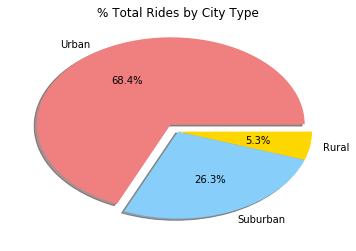

In [153]:
# Calculate Ride Percents
#Calculate total fares

total_rides = combined_data["ride_id"].count()
total_rides

# #URBAN %
urban_ride_count = urban_values["ride_id"].count()
urban_ride_per = (urban_ride_count / total_rides) * 100

# # SUBURBAN %
suburban_ride_count = suburban_values["ride_id"].count()
suburban_ride_per = (suburban_ride_count / total_rides) * 100

# RURAL
rural_ride_count = rural_values["ride_id"].count()
rural_ride_per = (rural_ride_count / total_rides) * 100

percents_ride = [urban_ride_per, suburban_ride_per, rural_ride_per]
colors = ["lightcoral", "lightskyblue", "gold"]
explode = (0.1, 0, 0)
labels = ["Urban", "Suburban", "Rural"]

# Build Pie Chart
plt.pie(percents_ride, explode=explode, colors=colors, labels=labels, autopct="%1.1f%%", shadow=True, startangle=0)
plt.title("% Total Rides by City Type")

# Save Figure

plt.savefig("Images/percent_rides_by_city.png")

plt.show()


In [154]:
# Show Figure
plt.show()

## Total Drivers by City Type

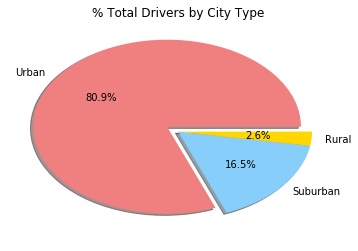

In [155]:
# Calculate Driver Percents

total_drivers = city_df["driver_count"].sum()

#URBAN %
urban_driver_values = city_df.loc[city_df['type'] == "Urban"]
driver_values_urban = urban_driver_values["driver_count"].sum()
urban_driver_per = (driver_values_urban / total_drivers) * 100

# SUBURBAN %
suburban_driver_values = city_df.loc[city_df['type'] == "Suburban"]
driver_values_suburban = suburban_driver_values["driver_count"].sum()
suburban_driver_per = (driver_values_suburban / total_drivers) * 100

# # RURAL
rural_driver_values = city_df.loc[city_df['type'] == "Rural"]
driver_values_rural = rural_driver_values["driver_count"].sum()
rural_driver_per = (driver_values_rural / total_drivers) * 100

percents_drivers = [urban_driver_per, suburban_driver_per, rural_driver_per]
colors = ["lightcoral", "lightskyblue", "gold"]
explode = (0.1, 0, 0)
labels = ["Urban", "Suburban", "Rural"]

# # Build Pie Chart
plt.pie(percents_drivers, explode=explode, colors=colors, labels=labels, autopct="%1.1f%%", shadow=True, startangle=0)
plt.title("% Total Drivers by City Type")

# Save Figure

plt.savefig("Images/percent_drivers_by_city.png")

plt.show()


Observable Trends:

By looking at the three pie charts, it is clear that urban populations account for higher use of Pyber, with higher driver and ride counts. This could be due to higher costs of parking and more of the population using public transportation and ride sharing as opposed to personl vehicles.

While rural rides account for less volume of rides, the fares are generally higher, as shown in the bubble plot. This could be because rural homes tend to be further away from main road and towns, resulting in longer rides and higher fares. 

There are fewest rural Pyber drivers, as shown in the bubble plot and third pie chart. There may be less of a need for Pyber drivers in these cities, as the ride count is also lower.